# Build Model

In [12]:
import pandas as pd
import researchpy as rp
import statsmodels.api as sm
import scipy.stats as stats


df = pd.read_excel("../0_dataset_master/Experiment_edited_V5b.xlsx", usecols=['subid','Traffic noise levels', 'SET', 'FeatureMatch_average'])
df.columns = ['subid','Traffic_noise_levels', 'FeatureMatch_average', 'SET']
set_mean = df['SET'].mean()
df['SET'].fillna(value=set_mean, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   subid                 306 non-null    int64  
 1   Traffic_noise_levels  306 non-null    int64  
 2   FeatureMatch_average  306 non-null    float64
 3   SET                   306 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 9.7 KB


In [13]:
rp.codebook(df)

Variable: subid    Data Type: int64 

 Number of Obs.: 306 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 34 

 Range: [1, 36] 
 Mean: 18.68 
 Standard Deviation: 10.65 
 Mode: 1 
 10th Percentile: 4.0 
 25th Percentile: 9.0 
 50th Percentile: 19.0 
 75th Percentile: 28.0 
 90th Percentile: 33.0 





Variable: Traffic_noise_levels    Data Type: int64 

 Number of Obs.: 306 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 3 

 Range: [45, 70] 
 Mean: 60.56 
 Standard Deviation: 8.97 
 Mode: 55 
 10th Percentile: 45.0 
 25th Percentile: 55.0 
 50th Percentile: 55.0 
 75th Percentile: 70.0 
 90th Percentile: 70.0 





Variable: FeatureMatch_average    Data Type: float64 

 Number of Obs.: 306 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 177 

 Range: [70.0, 243.0] 
 Mean: 152.16 
 Standard Deviation: 32.36 
 Mode: 152.5 
 10th Percentile: 108.0 
 25th Percentile: 133.125 
 50th Percentile: 150.5

In [14]:
rp.summary_cont(df.groupby(["Traffic_noise_levels"])["SET"])

,N,Mean,SD,SE,95% Conf.,Interval
Traffic_noise_levels,,,,,,
45,34,24.0765,0.2861,0.0491,23.9766,24.1763
55,136,27.3085,2.8739,0.2464,26.8211,27.7959
70,136,27.3147,2.9980,0.2571,26.8063,27.8231


Text(0, 0.5, 'SET')

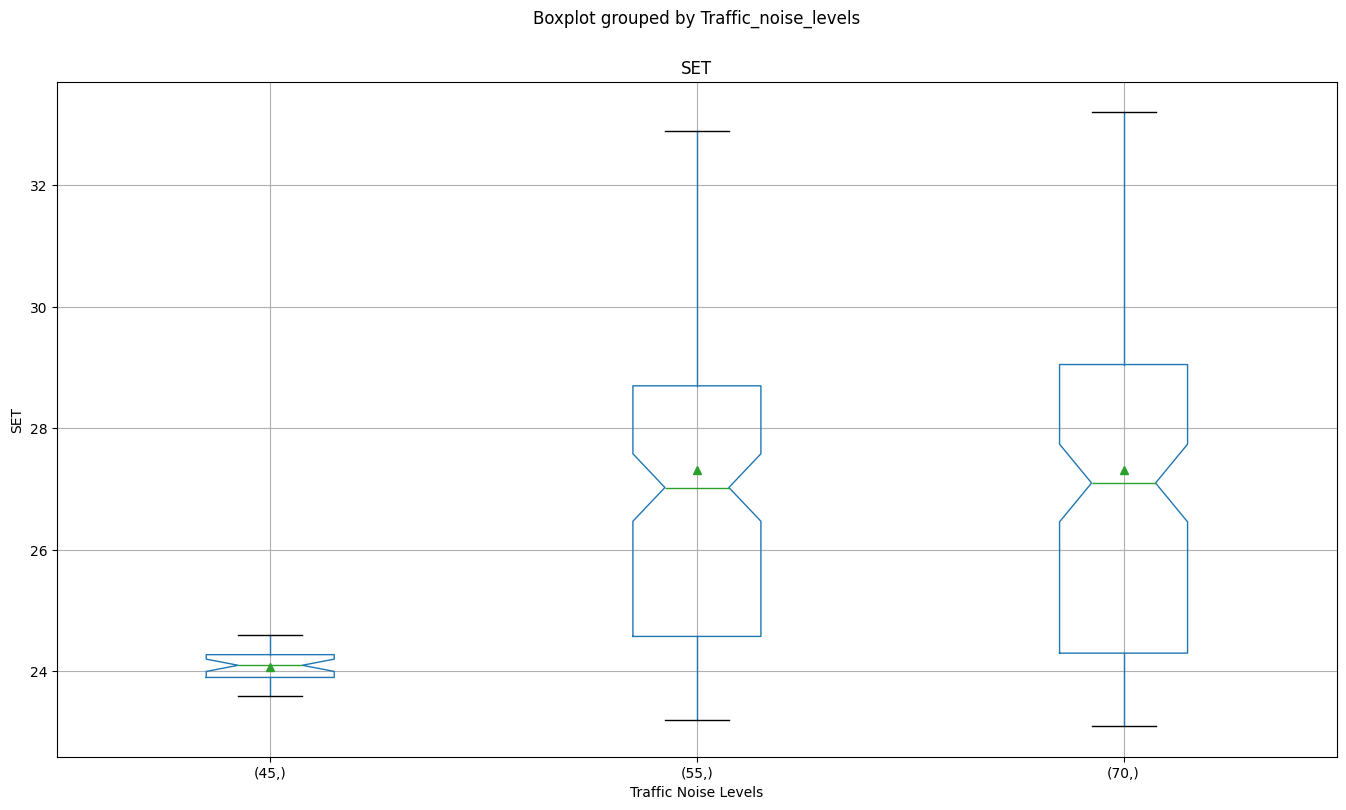

In [15]:
boxplot = df.boxplot(["SET"], by = ["Traffic_noise_levels"],
                     figsize = (16, 9),
                     showmeans = True,
                     notch = True)

boxplot.set_xlabel("Traffic Noise Levels")
boxplot.set_ylabel("SET")

In [16]:
import statsmodels.formula.api as smf
model = smf.mixedlm("SET ~ FeatureMatch_average",
                    df,
                    groups="Traffic_noise_levels").fit()

model.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
               Mixed Linear Model Regression Results
===================================================================
Model:                MixedLM     Dependent Variable:     SET      
No. Observations:     306         Method:                 REML     
No. Groups:           3           Scale:                  7.7194   
Min. group size:      34          Log-Likelihood:         -754.7354
Max. group size:      136         Converged:              Yes      
Mean group size:      102.0                                        
-------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept                26.360    1.301 20.266 0.000 23.811 28.910
FeatureMatch_average     -0.001    0.005 -0.121 0.903 -0.010  0.009
Traffic_noise_levels Var  3.256    1.238                           
===================================================================

"""

# Result Test

C:\Users\ZENI\AppData\Local\Temp\ipykernel_7920\3903560504.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(model.resid, hist = False, kde_kws = {"shade" : True, "lw": 1}, fit = stats.norm)
c:\Users\ZENI\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


Text(0.5, 0, 'Residuals')

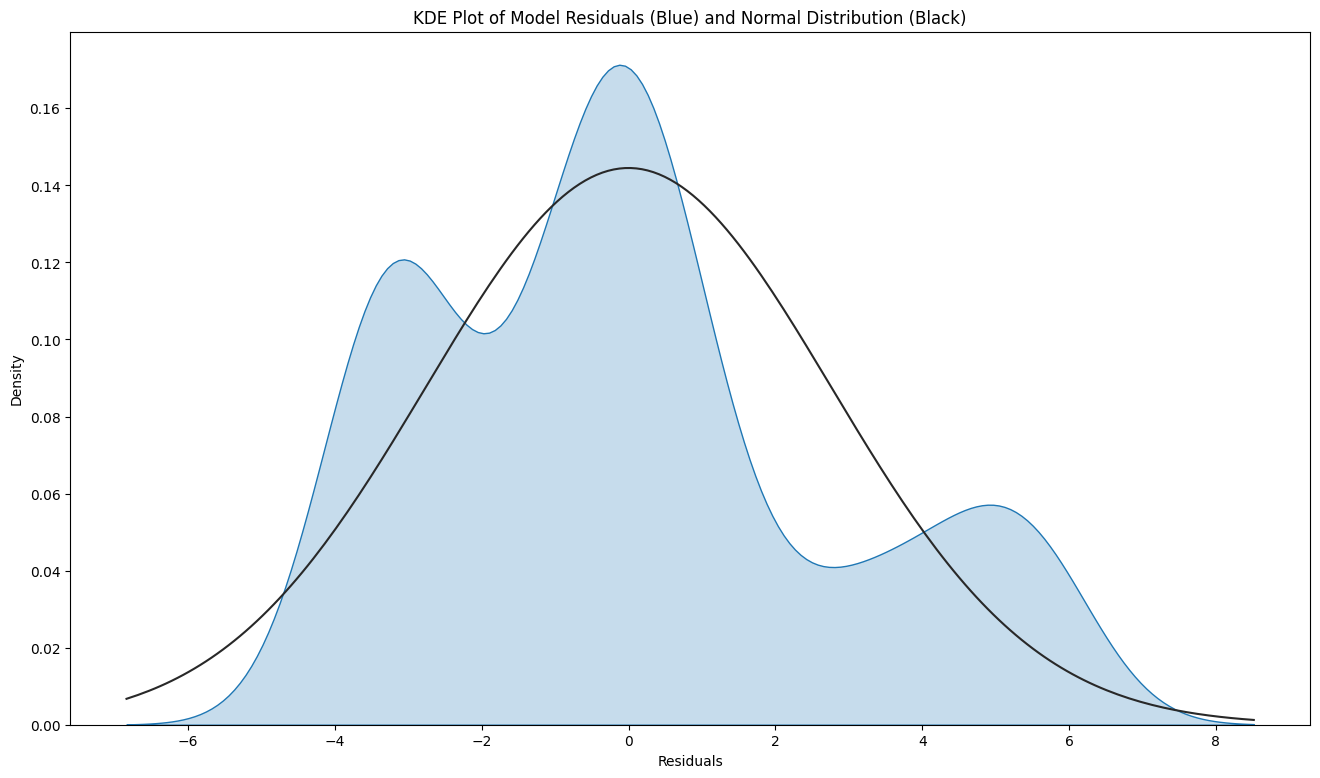

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize = (16, 9))

ax = sns.distplot(model.resid, hist = False, kde_kws = {"shade" : True, "lw": 1}, fit = stats.norm)

ax.set_title("KDE Plot of Model Residuals (Blue) and Normal Distribution (Black)")
ax.set_xlabel("Residuals")

Text(0.5, 1.0, 'Q-Q Plot')

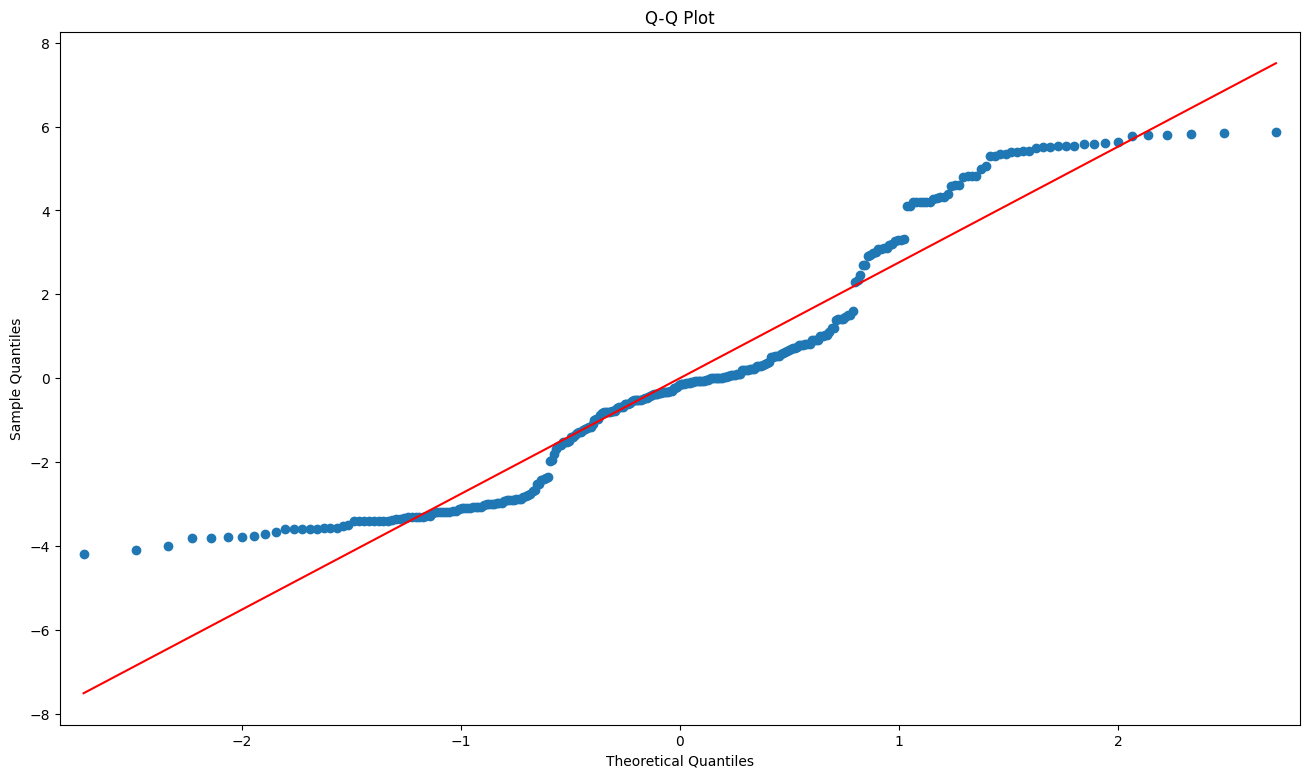

In [18]:
## Q-Q PLot

fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(111)

sm.qqplot(model.resid, dist = stats.norm, line = 's', ax = ax)

ax.set_title("Q-Q Plot")


In [19]:
labels = ["Statistic", "p-value"]

norm_res = stats.shapiro(model.resid)

for key, val in dict(zip(labels, norm_res)).items():
    print(key, val)

Statistic 0.9232410788536072
p-value 1.9610139900816392e-11


Text(0, 0.5, 'Residuals')

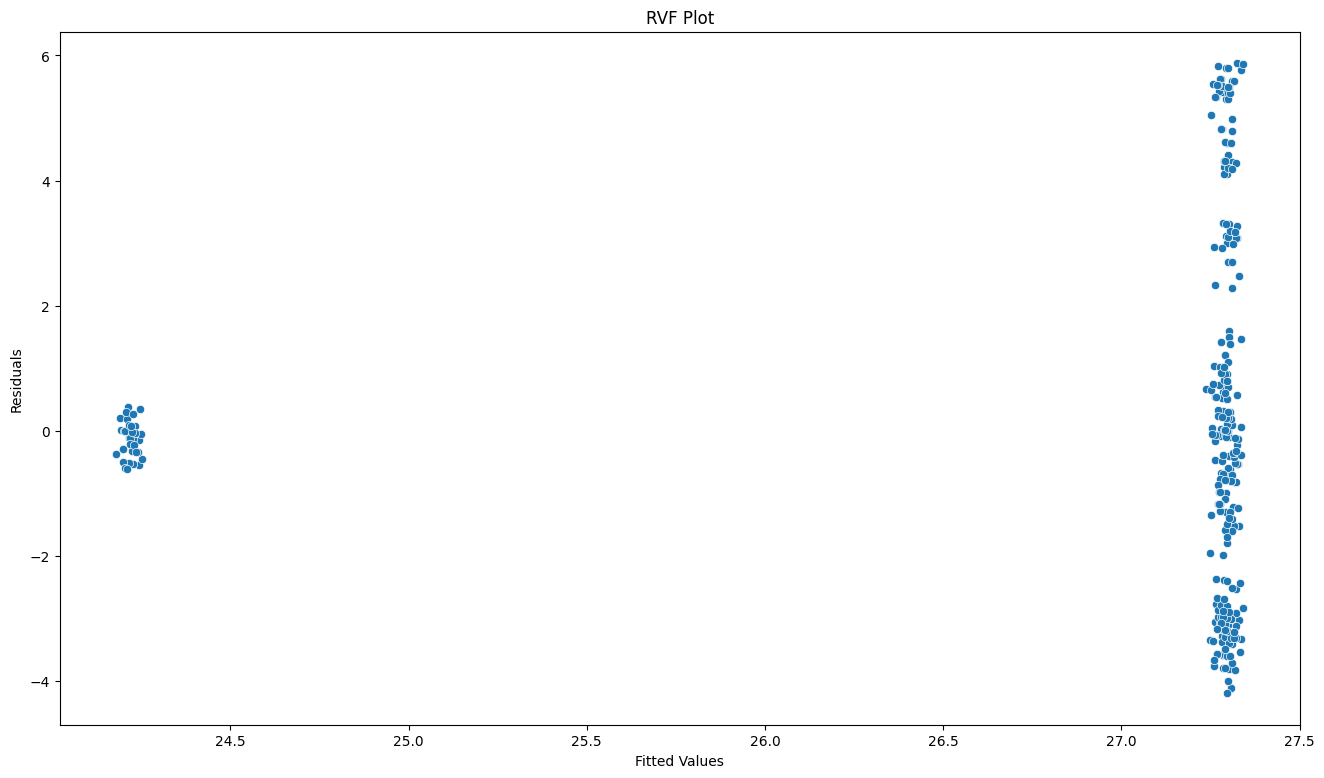

In [20]:
fig = plt.figure(figsize = (16, 9))

ax = sns.scatterplot(y = model.resid, x = model.fittedvalues)

ax.set_title("RVF Plot")
ax.set_xlabel("Fitted Values")
ax.set_ylabel("Residuals")

Text(0.5, 0, 'TNL')

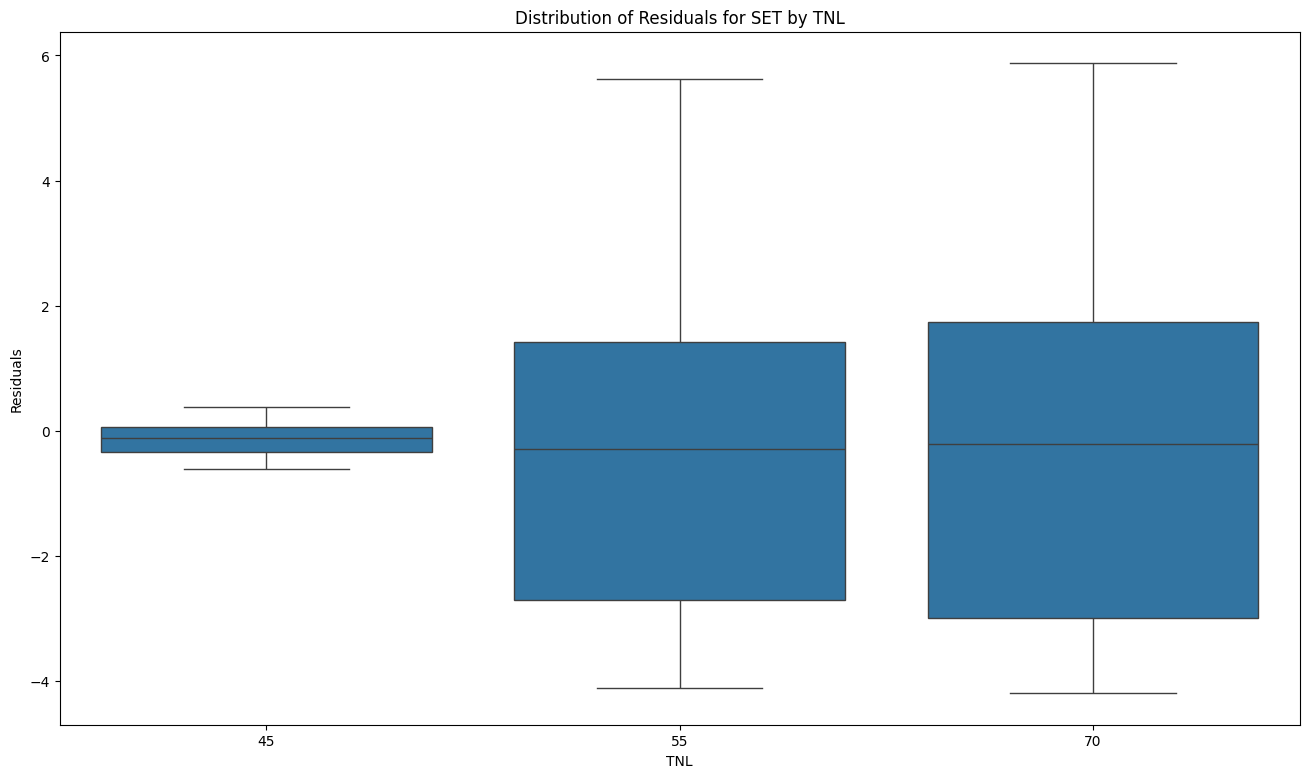

In [21]:
fig = plt.figure(figsize = (16, 9))

ax = sns.boxplot(x = model.model.groups, y = model.resid)

ax.set_title("Distribution of Residuals for SET by TNL")
ax.set_ylabel("Residuals")
ax.set_xlabel("TNL")

In [22]:
from statsmodels.stats.diagnostic import het_white

het_white_res = het_white(model.resid, model.model.exog)

labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]

for key, val in dict(zip(labels, het_white_res)).items():
    print(key, val)

LM Statistic 0.3984168401253083
LM-Test p-value 0.8193791004917546
F-Statistic 0.19751256081487203
F-Test p-value 0.8208754200722344
